# Machine Learning Engineer Nanodegree
## Unsupervised Learning
## Project: Creating Customer Segments

Welcome to the third project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started

In this project, you will analyze a dataset containing data on various customers' annual spending amounts (reported in *monetary units*) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). For the purposes of this project, the features `'Channel'` and `'Region'` will be excluded in the analysis — with focus instead on the six product categories recorded for customers.

Run the code block below to load the wholesale customers dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [22]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the wholesale customers dataset
try:
    data = pd.read_csv("customers.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print "Wholesale customers dataset has {} samples with {} features each.".format(*data.shape)
except:
    print "Dataset could not be loaded. Is the dataset missing?"

Wholesale customers dataset has 440 samples with 6 features each.


## Data Exploration
In this section, you will begin exploring the data through visualizations and code to understand how each feature is related to the others. You will observe a statistical description of the dataset, consider the relevance of each feature, and select a few sample data points from the dataset which you will track through the course of this project.

Run the code block below to observe a statistical description of the dataset. Note that the dataset is composed of six important product categories: **'Fresh'**, **'Milk'**, **'Grocery'**, **'Frozen'**, **'Detergents_Paper'**, and **'Delicatessen'**. Consider what each category represents in terms of products you could purchase.

In [23]:
# Display a description of the dataset
display(data.describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


### Implementation: Selecting Samples
To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail. In the code block below, add **three** indices of your choice to the `indices` list which will represent the customers to track. It is suggested to try different sets of samples until you obtain customers that vary significantly from one another.

In [24]:
# TODO: Select three indices of your choice you wish to sample from the dataset
indices = [5,10,25]

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print "Chosen samples of wholesale customers dataset:"
display(samples)

Chosen samples of wholesale customers dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,9413,8259,5126,666,1795,1451
1,3366,5403,12974,4400,5977,1744
2,16165,4230,7595,201,4003,57


### Question 1
Consider the total purchase cost of each product category and the statistical description of the dataset above for your sample customers.  
*What kind of establishment (customer) could each of the three samples you've chosen represent?*  
**Hint:** Examples of establishments include places like markets, cafes, and retailers, among many others. Avoid using names for establishments, such as saying *"McDonalds"* when describing a sample customer as a restaurant.

**Answer:**

To facilitate the analysis, I plotted the distribution of the total purchase cost for all customers on a boxplot together with the 3 samples.

* The first sample (customer 5) has a purchase pattern similar to a cafe. The purchase of milk is higher than the 75th percentile of the milk category and the purchase of frozen food is lower than the 25th percentile of the frozen category. The total purchase of grocery is only at the median of the grocery category. This customer maybe selling products produced using milk, such as coffee store, dessert cafe, etc. 
* The second sample (customer 10) has a purchase pattern similar to a supermarket. The total purchase of grocery, frozen food, paper, and detergent products are higher than the 75th percentile of the Detergents_Paper category. This supermarket may have less emphasis on fresh products as its total purchase is close to the 25th percentile of the fresh category.
* The third sample (customer 25) has a purchase pattern similar to a supermarket that focuses on fresh products. Its total purchase of frozen product is significantly lower than the 25th percentile of the frozen category. 

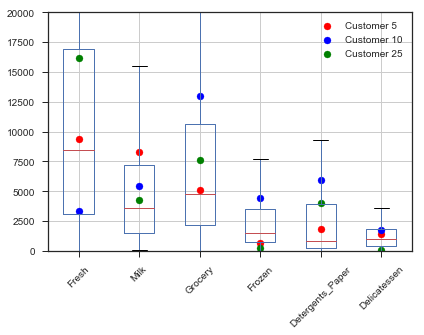

In [25]:
#The plot below is zoomed in at y values from 0 to 20,000 in order to 
#focus on the three samples.
import matplotlib.pyplot as plt
ix = [5,10,25]
color = ['red','blue','green']

data.boxplot()
plt.ylim(0,20000)
for ix,color in zip(ix,color):
    plt.scatter(np.arange(1,7),data.loc[ix].values,marker='o',
                color=color,label='Customer '+str(ix))
plt.legend(loc='upper right')
plt.tight_layout()
plt.xticks(rotation=45);

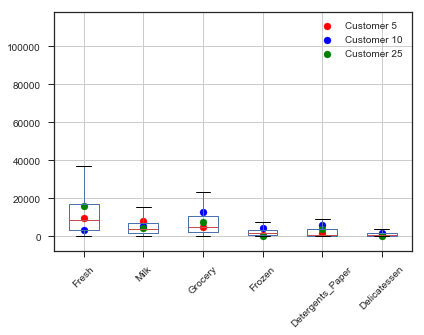

In [26]:
#The plot below is the full scale of the box plot and scatter plot.
import matplotlib.pyplot as plt
ix = [5,10,25]
color = ['red','blue','green']

data.boxplot()
for ix,color in zip(ix,color):
    plt.scatter(np.arange(1,7),data.loc[ix].values,marker='o',
                color=color,label='Customer '+str(ix))
plt.legend(loc='upper right')
plt.tight_layout()
plt.xticks(rotation=45);

### Implementation: Feature Relevance
One interesting thought to consider is if one (or more) of the six product categories is actually relevant for understanding customer purchasing. That is to say, is it possible to determine whether customers purchasing some amount of one category of products will necessarily purchase some proportional amount of another category of products? We can make this determination quite easily by training a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature.

In the code block below, you will need to implement the following:
 - Assign `new_data` a copy of the data by removing a feature of your choice using the `DataFrame.drop` function.
 - Use `sklearn.cross_validation.train_test_split` to split the dataset into training and testing sets.
   - Use the removed feature as your target label. Set a `test_size` of `0.25` and set a `random_state`.
 - Import a decision tree regressor, set a `random_state`, and fit the learner to the training data.
 - Report the prediction score of the testing set using the regressor's `score` function.

The best max depth: 3
R^2 score: 0.66228774712


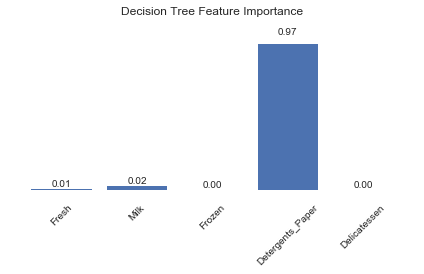

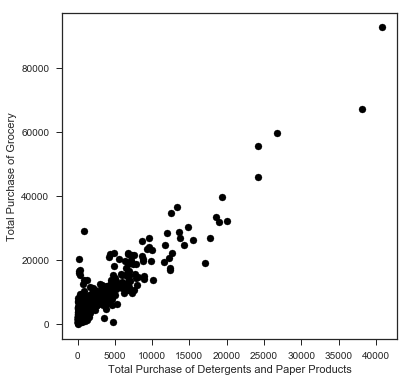

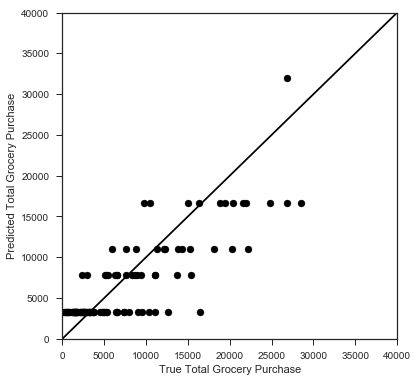

In [27]:
# TODO: Make a copy of the DataFrame, using the 'drop' function to drop the given feature
dropped = 'Grocery'
new_data = data.copy()
new_data.drop([dropped],axis=1, inplace=True)

# TODO: Split the data into training and testing sets using the given feature as the target
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(new_data, data[dropped], 
                                                    test_size=0.25,
                                                    random_state=42)

# TODO: Create a decision tree regressor and fit it to the training set
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.base import clone
params = {'max_depth': np.arange(1,21,2)}
clf = DecisionTreeRegressor(random_state=42)
kfold = KFold(n_splits=5,shuffle=True,random_state=42)
grid = GridSearchCV(estimator=clf,param_grid = params,scoring='r2',cv=kfold)
grid.fit(X_train,y_train)
print 'The best max depth:', grid.best_params_['max_depth']

regressor = clone(grid.best_estimator_)
regressor.fit(X_train,y_train)

# TODO: Report the score of the prediction using the testing set
score = regressor.score(X_test,y_test)
print 'R^2 score:',score
features = [col for col in list(data) if col != dropped]
fig, ax = plt.subplots()
bars = ax.bar(np.arange(5),regressor.feature_importances_)
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, 
            1.05*height,
            '%.2f' %height,
            ha='center',
            va='bottom')
plt.tick_params(top='off',bottom='off',left='off',right='off',labelleft='off')
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.xticks(np.arange(5),features,rotation=45)
plt.title('Decision Tree Feature Importance',y=1.1)
plt.tight_layout()
    
plt.figure(figsize=(6,6))
plt.scatter(data['Detergents_Paper'],data['Grocery'],color='black')
plt.xlabel('Total Purchase of Detergents and Paper Products')
plt.ylabel('Total Purchase of Grocery');

plt.figure(figsize=(6,6))
plt.scatter(y_test,regressor.predict(X_test),color='black')
plt.xlim(0,40000)
plt.ylim(0,40000)
plt.xlabel('True Total Grocery Purchase')
plt.ylabel('Predicted Total Grocery Purchase')
plt.plot([0,40000],[0,40000],color='black');

### Question 2
*Which feature did you attempt to predict? What was the reported prediction score? Is this feature necessary for identifying customers' spending habits?*  
**Hint:** The coefficient of determination, `R^2`, is scored between 0 and 1, with 1 being a perfect fit. A negative `R^2` implies the model fails to fit the data.

**Answer:**

I attempted to predict total grocery purchase. 

The $R^{2}$ is 0.66, indicating that there may be some correlation between the grocery feature and the other features. 

The grocery feature is not necessary for identifying customers' spending habits because it is correlated with at least one of the other features. Specifically, the total purchases of detergent and paper products is significantly more important than the others in predicting the the total grocery purchase according to the Decision Tree Regression(see the bar chart above). In addition, the scatter plot between 'grocery' and 'detergents_paper' shows a strong correlation between these features. Furthermore, the scatter plot between the true and predicted total grocery purchase indicates that the model captures the general trend, but the model fitting is not great. If we were to focus on the regression, perhaps we could try other regression algorithms, such as polynomial, SVR, KNN Regression, and others.

### Visualize Feature Distributions
To get a better understanding of the dataset, we can construct a scatter matrix of each of the six product features present in the data. If you found that the feature you attempted to predict above is relevant for identifying a specific customer, then the scatter matrix below may not show any correlation between that feature and the others. Conversely, if you believe that feature is not relevant for identifying a specific customer, the scatter matrix might show a correlation between that feature and another feature in the data. Run the code block below to produce a scatter matrix.

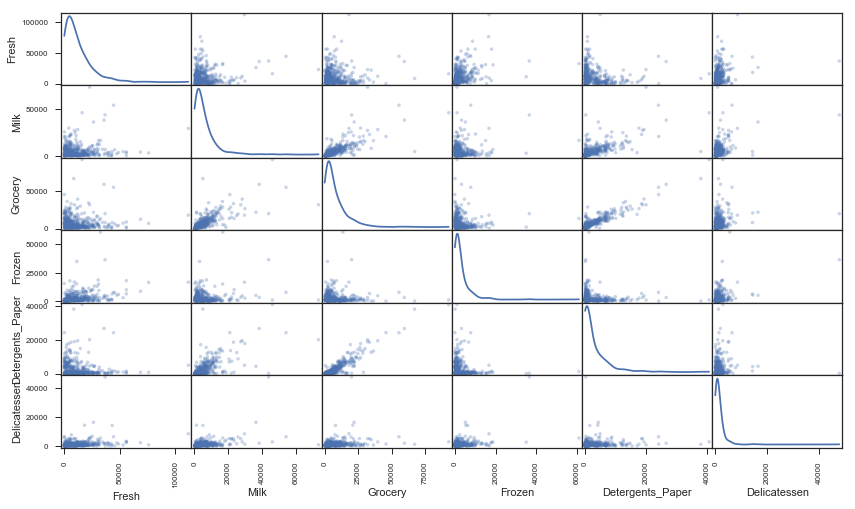

In [28]:
# Produce a scatter matrix for each pair of features in the data
pd.plotting.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Question 3
*Are there any pairs of features which exhibit some degree of correlation? Does this confirm or deny your suspicions about the relevance of the feature you attempted to predict? How is the data for those features distributed?*  
**Hint:** Is the data normally distributed? Where do most of the data points lie? 

**Answer:**

Yes, the most obvious correlations are among 'Grocery', 'Detergents_Paper', and 'Milk'. These correlations confirm that 'Grocery' is not a relevant feature in the above prediction exercise.

The diagonal elements of the above scatterplot matrix shows that the data are skewed - most of the data lie on the lower value ranges with outliers that are significantly higher than the majority of the data.

The correlation can also be viewed using the following heatmap.

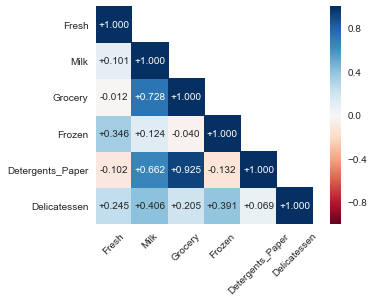

In [29]:
#The correlation can also be reviewed using the following heatmap.
corr = data.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, 1)] = True
with sns.axes_style("white"):
    ax = sns.heatmap(corr, mask=mask, square=True, annot=True,
                     cmap='RdBu', fmt='+.3f')
    plt.xticks(rotation=45, ha='center')

## Data Preprocessing
In this section, you will preprocess the data to create a better representation of customers by performing a scaling on the data and detecting (and optionally removing) outliers. Preprocessing data is often times a critical step in assuring that results you obtain from your analysis are significant and meaningful.

### Implementation: Feature Scaling
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most [often appropriate](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a [Box-Cox test](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html), which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural logarithm.

In the code block below, you will need to implement the following:
 - Assign a copy of the data to `log_data` after applying logarithmic scaling. Use the `np.log` function for this.
 - Assign a copy of the sample data to `log_samples` after applying logarithmic scaling. Again, use `np.log`.

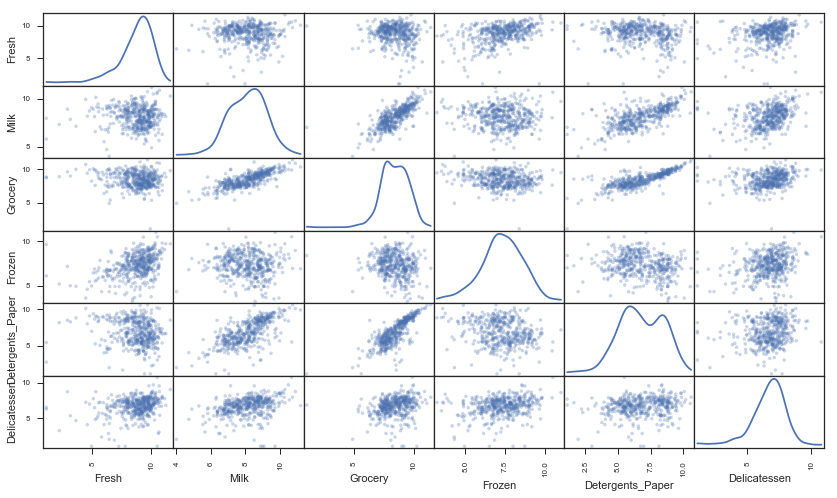

In [30]:
# TODO: Scale the data using the natural logarithm
log_data = np.log(data.copy())

# TODO: Scale the sample data using the natural logarithm
log_samples = np.log(samples.copy())

# Produce a scatter matrix for each pair of newly-transformed features
pd.plotting.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

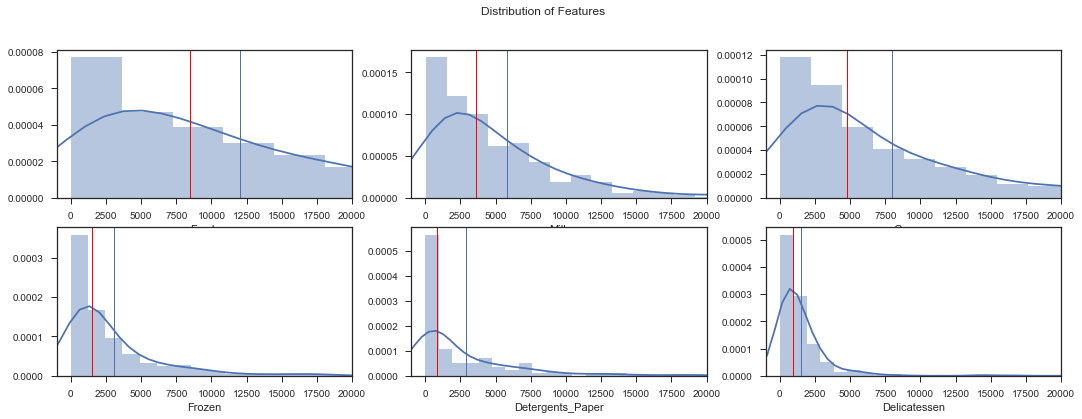

In [34]:
fig, axes = plt.subplots(2, 3)
axes = axes.flatten()
fig.set_size_inches(18, 6)
fig.suptitle('Distribution of Features')

for i, col in enumerate(data.columns):
    feature = data[col]
    sns.distplot(feature, label=col, ax=axes[i]).set(xlim=(-1000, 20000),)
    axes[i].axvline(feature.mean(),linewidth=1)
    axes[i].axvline(feature.median(),linewidth=1, color='r')

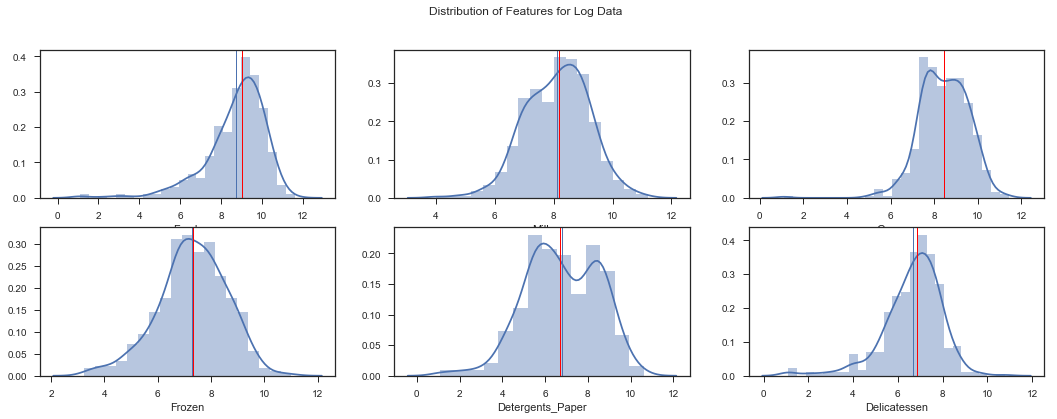

In [35]:
fig, axes = plt.subplots(2, 3)
axes = axes.flatten()
fig.set_size_inches(18, 6)
fig.suptitle('Distribution of Features for Log Data')

for i, col in enumerate(log_data.columns):
    feature = log_data[col]
    sns.distplot(feature, label=col, ax=axes[i])
    axes[i].axvline(feature.mean(),linewidth=1)
    axes[i].axvline(feature.median(),linewidth=1, color='r')

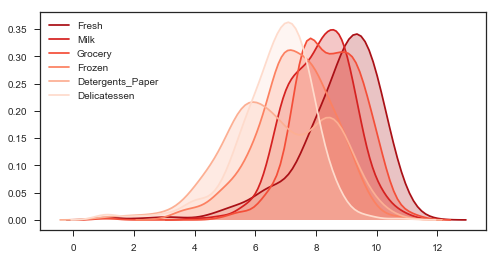

In [36]:
# set plot style & color scheme
sns.set_style('ticks')
with sns.color_palette("Reds_r"):
    # plot densities of log data
    plt.figure(figsize=(8,4))
    for col in data.columns:
        sns.kdeplot(log_data[col], shade=True)
    plt.legend(loc='best')

### Observation
After applying a natural logarithm scaling to the data, the distribution of each feature should appear much more normal. For any pairs of features you may have identified earlier as being correlated, observe here whether that correlation is still present (and whether it is now stronger or weaker than before).

Run the code below to see how the sample data has changed after having the natural logarithm applied to it.

In [37]:
# Display the log-transformed sample data
display(log_samples)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,9.149847,9.019059,8.542081,6.501290,7.492760,7.280008
1,8.121480,8.594710,9.470703,8.389360,8.695674,7.463937
2,9.690604,8.349957,8.935245,5.303305,8.294799,4.043051


### Implementation: Outlier Detection
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use [Tukey's Method for identfying outliers](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): An *outlier step* is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In the code block below, you will need to implement the following:
 - Assign the value of the 25th percentile for the given feature to `Q1`. Use `np.percentile` for this.
 - Assign the value of the 75th percentile for the given feature to `Q3`. Again, use `np.percentile`.
 - Assign the calculation of an outlier step for the given feature to `step`.
 - Optionally remove data points from the dataset by adding indices to the `outliers` list.

**NOTE:** If you choose to remove any outliers, ensure that the sample data does not contain any of these points!  
Once you have performed this implementation, the dataset will be stored in the variable `good_data`.

In [38]:
# For each feature find the data points with extreme high or low values
import pprint
outliers_dict = {}
outliers = []
for feature in log_data.keys():
    
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data[feature],25)
    
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data[feature],75)
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = 1.5 * (Q3 - Q1)
    
    # Display the outliers
    print "Data points considered outliers for the feature '{}':".format(feature)
    ix = ~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))
    display(log_data[ix])
    outliers_ix = [j for j in range(len(log_data)) if ix[j] == True]
    for j in outliers_ix:
        outliers_dict[j] = outliers_dict.get(j,[])
        outliers_dict[j].append(feature)
    outliers.extend(outliers_ix)
# OPTIONAL: Select the indices for data points you wish to remove
outliers = sorted(list(set(outliers)))
print 'Total number of outliers = ', len(outliers)
print 'The followings are the outliers'
pprint.pprint(outliers_dict)

#Temporarily do not remove outliers
outliers = []

# Remove the outliers, if any were specified
good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)

Data points considered outliers for the feature 'Fresh':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
81,5.389072,9.163249,9.575192,5.645447,8.964184,5.049856
95,1.098612,7.979339,8.740657,6.086775,5.407172,6.563856
96,3.135494,7.869402,9.001839,4.976734,8.262043,5.379897
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
171,5.298317,10.160530,9.894245,6.478510,9.079434,8.740337
193,5.192957,8.156223,9.917982,6.865891,8.633731,6.501290
218,2.890372,8.923191,9.629380,7.158514,8.475746,8.759669
304,5.081404,8.917311,10.117510,6.424869,9.374413,7.787382


Data points considered outliers for the feature 'Milk':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
86,10.039983,11.205013,10.377047,6.894670,9.906981,6.805723
98,6.220590,4.718499,6.656727,6.796824,4.025352,4.882802
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
356,10.029503,4.897840,5.384495,8.057377,2.197225,6.306275


Data points considered outliers for the feature 'Grocery':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442


Data points considered outliers for the feature 'Frozen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
38,8.431853,9.663261,9.723703,3.496508,8.847360,6.070738
57,8.597297,9.203618,9.257892,3.637586,8.932213,7.156177
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
145,10.000569,9.034080,10.457143,3.737670,9.440738,8.396155
175,7.759187,8.967632,9.382106,3.951244,8.341887,7.436617
264,6.978214,9.177714,9.645041,4.110874,8.696176,7.142827
325,10.395650,9.728181,9.519735,11.016479,7.148346,8.632128
420,8.402007,8.569026,9.490015,3.218876,8.827321,7.239215
429,9.060331,7.467371,8.183118,3.850148,4.430817,7.824446
439,7.932721,7.437206,7.828038,4.174387,6.167516,3.951244


Data points considered outliers for the feature 'Detergents_Paper':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
161,9.428190,6.291569,5.645447,6.995766,1.098612,7.711101


Data points considered outliers for the feature 'Delicatessen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
109,7.248504,9.724899,10.274568,6.511745,6.728629,1.098612
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
137,8.034955,8.997147,9.021840,6.493754,6.580639,3.583519
142,10.519646,8.875147,9.018332,8.004700,2.995732,1.098612
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
183,10.514529,10.690808,9.911952,10.505999,5.476464,10.777768
184,5.789960,6.822197,8.457443,4.304065,5.811141,2.397895
187,7.798933,8.987447,9.192075,8.743372,8.148735,1.098612
203,6.368187,6.529419,7.703459,6.150603,6.860664,2.890372


Total number of outliers =  42
The followings are the outliers
{38: ['Frozen'],
 57: ['Frozen'],
 65: ['Fresh', 'Frozen'],
 66: ['Fresh', 'Delicatessen'],
 75: ['Grocery', 'Detergents_Paper'],
 81: ['Fresh'],
 86: ['Milk'],
 95: ['Fresh'],
 96: ['Fresh'],
 98: ['Milk'],
 109: ['Delicatessen'],
 128: ['Fresh', 'Delicatessen'],
 137: ['Delicatessen'],
 142: ['Delicatessen'],
 145: ['Frozen'],
 154: ['Milk', 'Grocery', 'Delicatessen'],
 161: ['Detergents_Paper'],
 171: ['Fresh'],
 175: ['Frozen'],
 183: ['Delicatessen'],
 184: ['Delicatessen'],
 187: ['Delicatessen'],
 193: ['Fresh'],
 203: ['Delicatessen'],
 218: ['Fresh'],
 233: ['Delicatessen'],
 264: ['Frozen'],
 285: ['Delicatessen'],
 289: ['Delicatessen'],
 304: ['Fresh'],
 305: ['Fresh'],
 325: ['Frozen'],
 338: ['Fresh'],
 343: ['Delicatessen'],
 353: ['Fresh'],
 355: ['Fresh'],
 356: ['Milk'],
 357: ['Fresh'],
 412: ['Fresh'],
 420: ['Frozen'],
 429: ['Frozen'],
 439: ['Frozen']}


### Question 4
*Are there any data points considered outliers for more than one feature based on the definition above? Should these data points be removed from the dataset? If any data points were added to the `outliers` list to be removed, explain why.* 

**Answer:**

There are several data points considered outliers for more than one feature:

* Customer 65 has outliers in purchases of fresh and frozen products.
* Customer 66 has outliers in purchases of fresh and delicatessen products.
* Customer 75 has outliers in purchases of grocery, detergents, and paper products.
* Customer 128 has outliers in purchases of fresh and delicatessen products.
* Customer 154 has outliers in purchases of milk, grocery, and delicatessen products.

Note that the above outliers are listed only for data exploration purposes. None of the outliers was removed because I do not have any information on whether the outliers are most likely due to errors in measurements or are indeed characteristics of the customers. 

## Feature Transformation
In this section you will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

### Implementation: PCA

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the `good_data` to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the *explained variance ratio* of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.

In the code block below, you will need to implement the following:
 - Import `sklearn.decomposition.PCA` and assign the results of fitting PCA in six dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

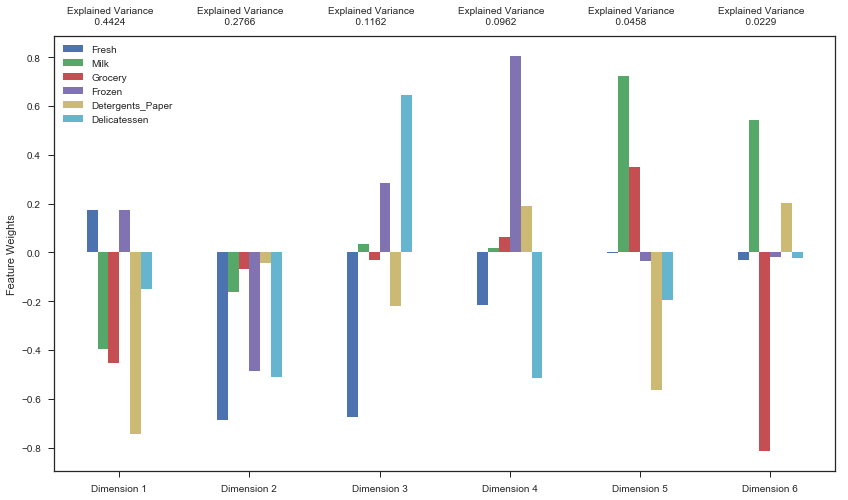

In [39]:
# TODO: Apply PCA by fitting the good data with the same number of dimensions as features
from sklearn.decomposition import PCA
pca = PCA().fit(good_data)

# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Generate PCA results plot
pca_results = vs.pca_results(good_data, pca)

### Question 5
*How much variance in the data is explained* ***in total*** *by the first and second principal component? What about the first four principal components? Using the visualization provided above, discuss what the first four dimensions best represent in terms of customer spending.*  
**Hint:** A positive increase in a specific dimension corresponds with an *increase* of the *positive-weighted* features and a *decrease* of the *negative-weighted* features. The rate of increase or decrease is based on the individual feature weights.

**Answer:**

The total variance explained by the first and second principal components is 0.719. The total variance explained by the first four principal components is  0.9314.

The principal components represent combinations of the original dimensions, features, or in this case, categories of purchase items. It is perhaps easier to first analyze one of our daily life examples. Suppose we are quantifying someone's health by measuring his/her cholesterol, HDL, LDL, and Triglyceride. Instead of quantifying his/her health using these 4 features or dimensions, we can reduce the dimensions by quantifying lipid profile, a new variable obtained from combination of the original 4 measurements (cholesterol, HDL, LDL, and Triglyceride). More formally, in Linear Algebra, we create this new variable from a linear combination of these 4 measurements. Here, the weights of the linear combination are chosen such that a highly positive lipid profile is characterized by low cholesterol, low LDL, low Triglyceride, and high HDL. Conversely, a highly negative lipid profile is characterized by high cholesterol, high LDL, high Triglyceride, and low HDL. Other combinations of high and low values of these measurements will result in somewhere in between highly positive and highly negative lipid profile values. By quantifying someone's health using this lipid profile, we compress or reduce the dimension of our data from four dimensions to one dimension.

Similarly, here, we are reducing the dimensions of the consumer segment data from six to four dimensions and two dimensions later in the clustering section. While the lipid profile is characterized by certain pattern of cholesterol, HDL, LDL, and Triglyceride values, each principal component in this project is characterized by certain purchasing patterns:

* For the first principal component, a positive value is characterized by high purchase of fresh and frozen products; low purchase of milk, grocery, detergents, papers, and delicatessen products. A negative value is characterized by low purchase of fresh and frozen products; high purchase of milk, grocery, detergents, papers, and delicatessen products.

* For the second principal component, a positive value is characterized by low purchase of all products, especially fresh, frozen, and delicatessen products. A negative value is characterized by high purchase of all products, especially fresh, frozen, and delicatessen products.

* For the third principal component, a positive value is characterized by high purchase of mlik, frozen, and delicatessen products; low purchase of fresh, grocery, detergents, and paper products. A negative value is characterized by low purchase of mlik, frozen, and delicatessen products; high purchase of fresh, grocery, detergents, and paper products.

* For the fourth principal component, a positive value is characterized by high purchase of milk, grocery, frozen, detergent, and paper products; low purchase of fresh and delicatessen products. A negative value is characterized by low purchase of milk, grocery, frozen, detergent, and paper products; high purchase of fresh and delicatessen products.

**Note:** The signs of the principal components are reversible. So, the above interpretation is only for the signs of the principal components provided in this project.

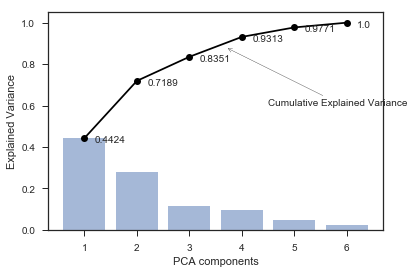

In [40]:
# create an x-axis variable for each pca component
x = np.arange(1,7)

# plot the cumulative variance
plt.plot(x, np.cumsum(pca.explained_variance_ratio_), '-o', color='black')

# plot the components' variance
plt.bar(x, pca.explained_variance_ratio_, align='center', alpha=0.5)

# plot styling
plt.ylim(0, 1.05)
plt.annotate('Cumulative Explained Variance',
             xy=(3.7, .88), arrowprops=dict(arrowstyle='->'), xytext=(4.5, .6))
for i,j in zip(x, np.cumsum(pca.explained_variance_ratio_)):
    plt.annotate(str(j.round(4)),xy=(i+.2,j-.02))
plt.xticks(range(1,7))
plt.xlabel('PCA components')
plt.ylabel('Explained Variance')
plt.show()

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it in six dimensions. Observe the numerical value for the first four dimensions of the sample points. Consider if this is consistent with your initial interpretation of the sample points.

In [20]:
# Display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6
0,-1.0838,-0.3929,-0.2417,-0.8931,0.1939,0.5362
1,-2.1162,-0.7488,0.8007,1.0355,-0.5710,-0.2135
2,-1.2251,1.5185,-3.2435,-0.1471,0.0707,0.0942


### Implementation: Dimensionality Reduction
When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in effect, reducing the complexity of the problem. Dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the *cumulative explained variance ratio* is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a signifiant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.

In the code block below, you will need to implement the following:
 - Assign the results of fitting PCA in two dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `good_data` using `pca.transform`, and assign the results to `reduced_data`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

In [43]:
# TODO: Apply PCA by fitting the good data with only two dimensions
pca = PCA(n_components=2)
pca.fit(good_data)

# TODO: Transform the good data using the PCA fit above
reduced_data = pca.transform(good_data)

# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it using only two dimensions. Observe how the values for the first two dimensions remains unchanged when compared to a PCA transformation in six dimensions.

In [44]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

,Dimension 1,Dimension 2
0,-1.0838,-0.3929
1,-2.1162,-0.7488
2,-1.2251,1.5185


## Visualizing a Biplot
A biplot is a scatterplot where each data point is represented by its scores along the principal components. The axes are the principal components (in this case `Dimension 1` and `Dimension 2`). In addition, the biplot shows the projection of the original features along the components. A biplot can help us interpret the reduced dimensions of the data, and discover relationships between the principal components and original features.

Run the code cell below to produce a biplot of the reduced-dimension data.

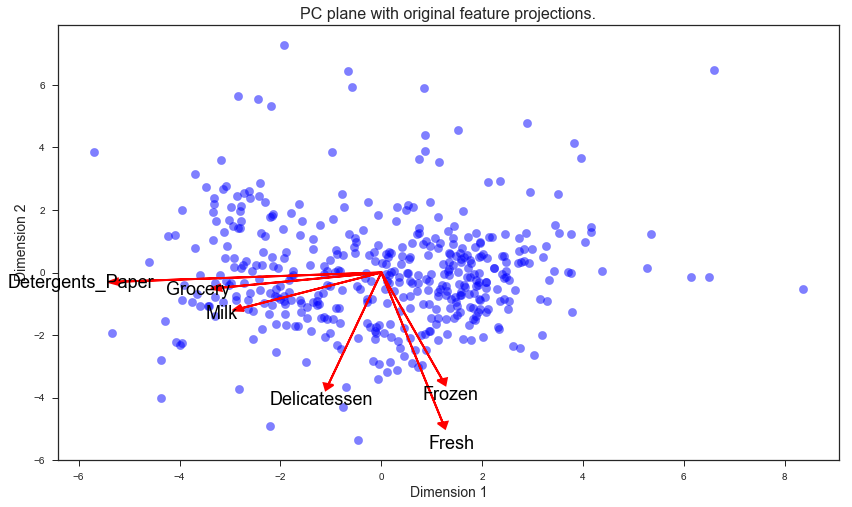

In [45]:
# Create a biplot
vs.biplot(good_data, reduced_data, pca)

### Observation

Once we have the original feature projections (in red), it is easier to interpret the relative position of each data point in the scatterplot. For instance, a point the lower right corner of the figure will likely correspond to a customer that spends a lot on `'Milk'`, `'Grocery'` and `'Detergents_Paper'`, but not so much on the other product categories. 

From the biplot, which of the original features are most strongly correlated with the first component? What about those that are associated with the second component? Do these observations agree with the pca_results plot you obtained earlier?

**Answer**

The first principal component is strongly correlated with `Detergents_Paper`, `Grocery`, and `Milk`. The second principal component is strongly correlated with `Delicatessen`, `Fresh`, and `Frozen`. This correlation aligns with the `pca_results` plot. In fact, the weights shown on the `pca_results` plot are the PC1 and PC2 coordinates of the arrows.

## Clustering

In this section, you will choose to use either a K-Means clustering algorithm or a Gaussian Mixture Model clustering algorithm to identify the various customer segments hidden in the data. You will then recover specific data points from the clusters to understand their significance by transforming them back into their original dimension and scale. 

### Question 6
*What are the advantages to using a K-Means clustering algorithm? What are the advantages to using a Gaussian Mixture Model clustering algorithm? Given your observations about the wholesale customer data so far, which of the two algorithms will you use and why?*

**Answer:**

**K-Means**

Strength:
* It scales well to large number of samples.
* It has been widely used in various applications.

Weakness:
* It assumes that the distribution of each feature is spherical, and performs poorly on elongated clusters or clusters with irregular shapes.
* It assumes that all clusters have roughly equal number of data points, and perform poorly in clusters with unequal number of data points.
* In high dimensions, Euclidean distances are inflated, resulting in high computational costs. Performing dimensionality reduction, such as PCA prior to K-Means can reduce this issue.

**Gaussian Mixture Model**

Strength:
* It is the fastest algorithm for clustering mixtures.
* It does not assume that the mean is closer to zero, or the clusters have specific structures.

Weakness:
*  When there is insufficient number of data points per cluster, it may be difficult for the algorithm to converge.

Based on the above properties, I will choose Gaussian Mixture Model because the above biplot does not clearly show spherical and equally distributed clusters, indicating that this dataset may be less suitable for K-Means.

**References**

* http://varianceexplained.org/r/kmeans-free-lunch/
* http://scikit-learn.org/stable/modules/clustering.html#k-means
* http://scikit-learn.org/stable/modules/mixture.html#mixture

### Implementation: Creating Clusters
Depending on the problem, the number of clusters that you expect to be in the data may already be known. When the number of clusters is not known *a priori*, there is no guarantee that a given number of clusters best segments the data, since it is unclear what structure exists in the data — if any. However, we can quantify the "goodness" of a clustering by calculating each data point's *silhouette coefficient*. The [silhouette coefficient](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). Calculating the *mean* silhouette coefficient provides for a simple scoring method of a given clustering.

In the code block below, you will need to implement the following:
 - Fit a clustering algorithm to the `reduced_data` and assign it to `clusterer`.
 - Predict the cluster for each data point in `reduced_data` using `clusterer.predict` and assign them to `preds`.
 - Find the cluster centers using the algorithm's respective attribute and assign them to `centers`.
 - Predict the cluster for each sample data point in `pca_samples` and assign them `sample_preds`.
 - Import `sklearn.metrics.silhouette_score` and calculate the silhouette score of `reduced_data` against `preds`.
   - Assign the silhouette score to `score` and print the result.

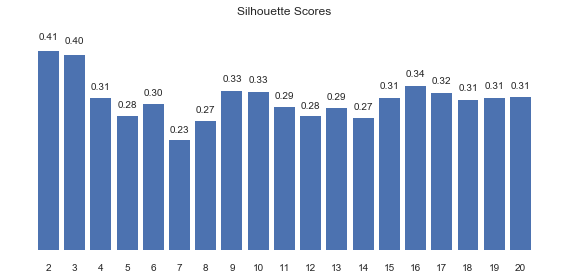

,Silhouette Scores
Num of Clusters,
2,0.409968
3,0.401946
4,0.312142
5,0.276393
6,0.300884
7,0.226661
8,0.266312
9,0.326906
10,0.326250


In [46]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

scores = []
n_clusters = range(2,21)

for n_cluster in n_clusters:
    # TODO: Apply your clustering algorithm of choice to the reduced data 
    clusterer = GaussianMixture(n_components=n_cluster,random_state=0).fit(reduced_data)

    # TODO: Predict the cluster for each data point
    preds = clusterer.predict(reduced_data)

    # TODO: Find the cluster centers
    centers = clusterer.means_

    # TODO: Predict the cluster for each transformed sample data point
    sample_preds = clusterer.predict(pca_samples)

    # TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
    score = silhouette_score(reduced_data,preds)
    scores.append(score)

fig, ax = plt.subplots(figsize=(8,4))
bars = ax.bar(np.arange(2,21),scores)
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, 
            1.05*height,
            '%.2f' %height,
            ha='center',
            va='bottom')
plt.tick_params(top='off',bottom='off',left='off',right='off',labelleft='off')
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.xticks(np.arange(2,21))
plt.title('Silhouette Scores',y=1.1)
plt.tight_layout()
plt.show()

df_silhouette = pd.DataFrame(scores,np.arange(2,21),columns = ['Silhouette Scores'])
df_silhouette.index.rename('Num of Clusters',inplace=True)
display(df_silhouette)

### Question 7
*Report the silhouette score for several cluster numbers you tried. Of these, which number of clusters has the best silhouette score?* 

**Answer:**

The silhouette scores vs the number of clusters are shown in the above bar chart and table. Two clusters give the highest silhouette score. 

### Cluster Visualization
Once you've chosen the optimal number of clusters for your clustering algorithm using the scoring metric above, you can now visualize the results by executing the code block below. Note that, for experimentation purposes, you are welcome to adjust the number of clusters for your clustering algorithm to see various visualizations. The final visualization provided should, however, correspond with the optimal number of clusters. 

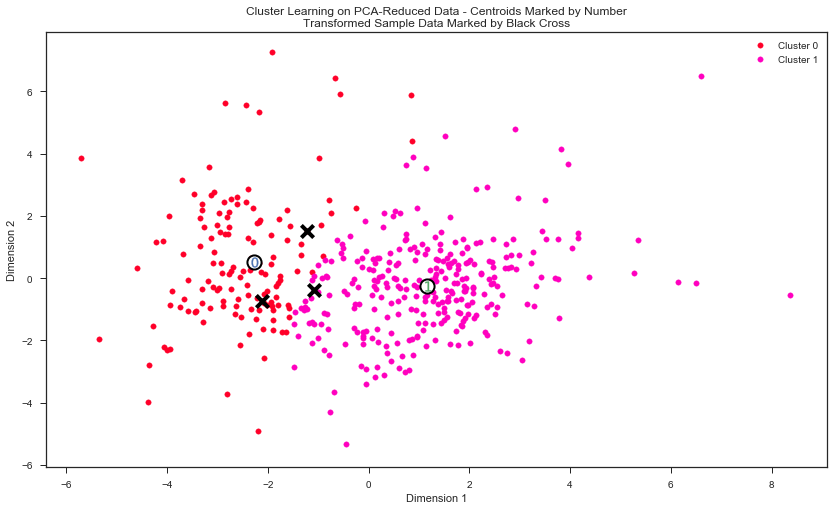

In [47]:
# Display the results of the clustering from implementation
# Use 2 clusters for clustering
clusterer = GaussianMixture(n_components=2,random_state=0).fit(reduced_data)
preds = clusterer.predict(reduced_data)
sample_preds = clusterer.predict(pca_samples)
centers = clusterer.means_
vs.cluster_results(reduced_data, preds, centers, pca_samples)

### Implementation: Data Recovery
Each cluster present in the visualization above has a central point. These centers (or means) are not specifically data points from the data, but rather the *averages* of all the data points predicted in the respective clusters. For the problem of creating customer segments, a cluster's center point corresponds to *the average customer of that segment*. Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.

In the code block below, you will need to implement the following:
 - Apply the inverse transform to `centers` using `pca.inverse_transform` and assign the new centers to `log_centers`.
 - Apply the inverse function of `np.log` to `log_centers` using `np.exp` and assign the true centers to `true_centers`.


In [48]:
# TODO: Inverse transform the centers
log_centers = pca.inverse_transform(centers)

# TODO: Exponentiate the centers
true_centers = np.exp(log_centers)

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
display(true_centers)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,2939.0,7576.0,12536.0,781.0,4702.0,848.0
Segment 1,9029.0,2229.0,2798.0,2051.0,380.0,754.0


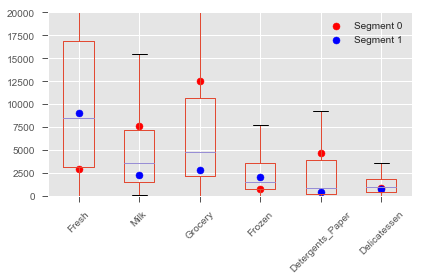

In [52]:
#The plot below is the zoomed in box plot and scatter plot.
import matplotlib.pyplot as plt
color = ['red','blue']

data.boxplot()
for ix,color in zip(['Segment 0','Segment 1'],color):
    plt.scatter(np.arange(1,7),true_centers.loc[ix].values,marker='o',
                color=color,label=ix)
plt.legend(loc='upper right')
plt.ylim(0,20000)
plt.xticks(rotation=45)
plt.tight_layout();

### Question 8
Consider the total purchase cost of each product category for the representative data points above, and reference the statistical description of the dataset at the beginning of this project. *What set of establishments could each of the customer segments represent?*  
**Hint:** A customer who is assigned to `'Cluster X'` should best identify with the establishments represented by the feature set of `'Segment X'`.

**Answer:**

In order to compare the two clusters, Segment 0 and Segment 1, `true_centers` data points are added to the box plot of the dataset (see the above plot). 

Segment 0 is characterized by high purchase of milk, grocery, detergents, and paper products. Customers in this segment could represent supermarket/grocery store type of establishments.

Segment 1 is characterized by ~50th - 75th percentile purchase of fresh and frozen products, as well as below 50th percentile purchase of the other product categories. Customers in this segment could represent restaurant or cafe types of establishments.

### Question 9
*For each sample point, which customer segment from* ***Question 8*** *best represents it? Are the predictions for each sample point consistent with this?*

Run the code block below to find which cluster each sample point is predicted to be.

In [28]:
# Display the predictions
for i, pred in enumerate(sample_preds):
    print "Sample point", i, "predicted to be in Cluster", pred

Sample point 0 predicted to be in Cluster 1
Sample point 1 predicted to be in Cluster 0
Sample point 2 predicted to be in Cluster 0


**Answer:**

The followings are the prediction from PCA followed by GMM clustering:

* Customer 5: Segment 1
* Customer 10: Segment 0
* Customer 25: Segment 0

This clustering (Question 8) agrees with the prediction based on comparing the total purchase of the sample customers in each category with the summary statistics of the whole dataset (Question 1).

## Conclusion

In this final section, you will investigate ways that you can make use of the clustered data. First, you will consider how the different groups of customers, the ***customer segments***, may be affected differently by a specific delivery scheme. Next, you will consider how giving a label to each customer (which *segment* that customer belongs to) can provide for additional features about the customer data. Finally, you will compare the ***customer segments*** to a hidden variable present in the data, to see whether the clustering identified certain relationships.

### Question 10
Companies will often run [A/B tests](https://en.wikipedia.org/wiki/A/B_testing) when making small changes to their products or services to determine whether making that change will affect its customers positively or negatively. The wholesale distributor is considering changing its delivery service from currently 5 days a week to 3 days a week. However, the distributor will only make this change in delivery service for customers that react positively. *How can the wholesale distributor use the customer segments to determine which customers, if any, would react positively to the change in delivery service?*  
**Hint:** Can we assume the change affects all customers equally? How can we determine which group of customers it affects the most?

**Answer:**

We could do the followings:

* First, draw a sample of size ~50% from each cluster to be tested with the new delivery service. The best way to do this is to communicate with our customers and invite them to participate. Provide them with the rationales why this may benefit their businesses. In addition, reassure them that this is a trial for a fixed period of time, and may be adjusted according to the customer feedback. 

* Second, provide the new delivery service to the sample customers from each of the two segments, and gather feedback.

* Third, perform hypothesis testing on whether our customers have significantly more negative feedback on the new service for each segment. More specifically, the null hypothesis is there is no significant negative feedback on the new service, and the alternative hypothesis is there is a significant negative feedback on the new service.

### Question 11
Additional structure is derived from originally unlabeled data when using clustering techniques. Since each customer has a ***customer segment*** it best identifies with (depending on the clustering algorithm applied), we can consider *'customer segment'* as an **engineered feature** for the data. Assume the wholesale distributor recently acquired ten new customers and each provided estimates for anticipated annual spending of each product category. Knowing these estimates, the wholesale distributor wants to classify each new customer to a ***customer segment*** to determine the most appropriate delivery service.  
*How can the wholesale distributor label the new customers using only their estimated product spending and the* ***customer segment*** *data?*  
**Hint:** A supervised learner could be used to train on the original customers. What would be the target variable?

**Answer:**

We could do the followings:

1. Create a supervised learning (classification) dataset where the input variables are the total purchases in each categories and the labels are either Segment 0 or Segment 1 based on the results of the PCA followed by GMM clustering in this study.

2. Select the best classifier and perform hyperparameter tuning for the best classifier as follows:

    * First, identify a set of classification algorithms (e.g. Logistic Regression, Random Forest, KNN, SVC, and others)
    * Identify the hyperparameters and their values to be explored.
    * Perform algorithm selection using repeated nested cross validation. Here, we can iterate GridSearchCV for each train-test data split generated using StratifiedKFold. Accuracy score should be used to analyze the model performance. 
    * Once we select the algorithm that has the best accuracy score, we can then perform model selection using repeated cross validation. Similarly, accuracy score should be used here.
    * Once we have the algorithm with the optimized model, we can retrain the model on the whole dataset and then predict the segment of the new 10 customers.

Details regarding algorithm selection using repeated nested cross validation and model selection using repeated cross validation can be found in a [previous study](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3994246/pdf/1758-2946-6-10.pdf) and my [Enron Fraud](https://github.com/lmarkely/enron_fraud) project.

### Visualizing Underlying Distributions

At the beginning of this project, it was discussed that the `'Channel'` and `'Region'` features would be excluded from the dataset so that the customer product categories were emphasized in the analysis. By reintroducing the `'Channel'` feature to the dataset, an interesting structure emerges when considering the same PCA dimensionality reduction applied earlier to the original dataset.

Run the code block below to see how each data point is labeled either `'HoReCa'` (Hotel/Restaurant/Cafe) or `'Retail'` the reduced space. In addition, you will find the sample points are circled in the plot, which will identify their labeling.

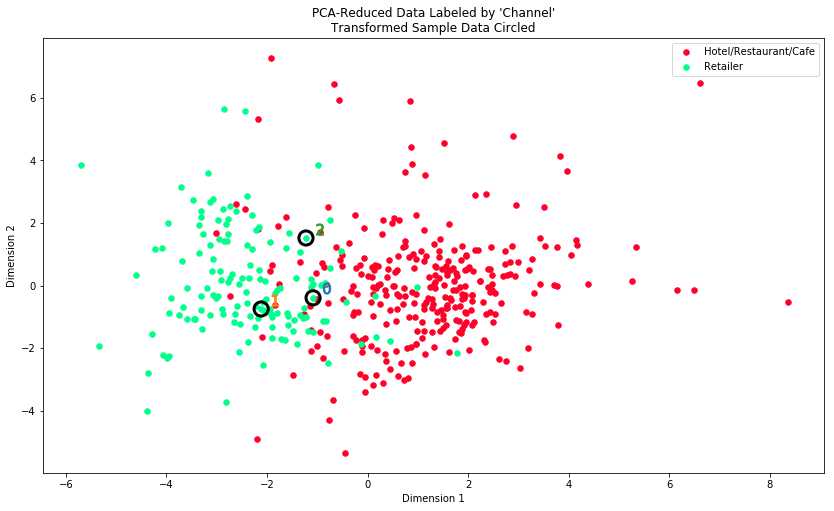

In [29]:
# Display the clustering results based on 'Channel' data
vs.channel_results(reduced_data, outliers, pca_samples)

### Question 12
*How well does the clustering algorithm and number of clusters you've chosen compare to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers? Are there customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution? Would you consider these classifications as consistent with your previous definition of the customer segments?*

**Answer:**

The clustering algorithm and the number of clusters chosen match with the underlying distribution of `Hotel/Restaurant/Cafe` and `Retailer` customers. In my analysis, Segment 0 represents supermarket/grocery type of establishment, while Segment 1 represents restaurant/cafe type of establishment.

The above plot show some overlaps between the two clusters. Those customers in these overlapping regions cannot be classified as purely Segment 0 (`Retailer`) or Segment 1 (`Hotel/Restaurant/Cafe`) in this reduced 2D space. However, those customers on the far left can be considered as purely Segment 0 (`Retailer`) and those on the far right can be considered as purely Segment 1 (`Hotel/Restaurant/Cafe`).

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.